# Assignment 1
The purpose of this assignment is to reproduce the following experiment: train a neural network which takes in input a binary vector of 6 digits and detects if the vector is symmetric in respect to the center or not. The neural network must have one hidden layer with two nodes.

In [1]:
import torch
import itertools
import matplotlib.pyplot as plt

## Generation of the dataset
The dataset is composed of the 64 possible vectors, labelled 1 if the vector is symmetric and 0 otherwise. 

In [2]:
def label_of_vector(x):
    """Returns the label of a vector."""
    return 1 if x[2] == x[3] and x[1] == x[4] and x[0] == x[5] else 0

In [3]:
def build_dataset():
    """Builds the dataset"""
    X = torch.tensor(list(itertools.product([0,1],repeat=6)),dtype=torch.float32)
    Y = torch.tensor([label_of_vector(x) for x in X], dtype=torch.float32)
    return X,Y

X,Y = build_dataset()

## Generation of the neural network
The network has been built as specified in the paper:
- 6 input nodes
- 1 hidden layer with 2 nodes
- 1 output node

The non-linearity in every connection and in the output is obtained using a sigmoid. Moreover, every weight and bias has been initialized uniformally between -0.3 and 0.3.

In [4]:
class BinaryCLassifier(torch.nn.Module):
    """Builds the network as specified: 
        - 6 input nodes
        - 1 hidden layer with 2 nodes
        - 1 output node
        The non-linearity in every connection and in the output is obtained using a sigmoid."""
    
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features = 6, out_features = 2, bias = True)
        self.layer2 = torch.nn.Linear(in_features = 2, out_features = 1, bias = True)
        self.activation = torch.nn.Sigmoid()
        self.apply(self._init_weights)
        
    def _init_weights(self, module):
        """Initializes weights and biases uniformally between -0.3 and 0.3"""
        if isinstance(module, torch.nn.Linear):
            module.weight.data.uniform_(-0.3, 0.3)
            module.bias.data.uniform_(-0.3, 0.3)
    
    def forward(self,x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        return x
    
model = BinaryCLassifier()

In [5]:
def calculate_accuracy(model, X, Y):
    """Evaluates the accuracy based on the entire dataset"""
    model.eval()
    with torch.no_grad():
        correct=0
        out=model(X)
        correct+=(out == Y).float().sum()
        return float(correct/len(X))

## Defining the parameters
To train the model there has been used:
- Stochastic Gradient Descent with a constant learning rate of 0.1 and a momentum of 0.9
- Mean Squared Error as loss function

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

loss=torch.nn.MSELoss()

## Training the network
As specified in the paper, the entire dataset has been swept 1425 times and for every sweep the weights and biases has been updated according to the descent.

Final accuracy:  0.0


Text(0, 0.5, 'MSE Loss')

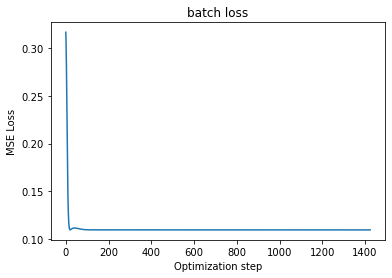

In [7]:
epochs=1425
losses=[]
for epoch in range(epochs):
    model.train()
    out=model(X).reshape(64)
    l=loss(out, Y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    losses.append(l.item())
print("Final accuracy: ", calculate_accuracy(model, X, Y))

plt.figure()
plt.title("batch loss")
plt.plot(losses)
plt.xlabel("Optimization step")
plt.ylabel("MSE Loss")

In [15]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name,":",sep="")
        for value in param.data:
            print("\t",value)

layer1.weight:
	 tensor([-0.1711, -0.1388,  0.1004, -0.2889, -0.2574,  0.1377])
	 tensor([ 0.0574,  0.2708, -0.1026, -0.1322,  0.2342,  0.1782])
layer1.bias:
	 tensor(-0.3047)
	 tensor(-0.0884)
layer2.weight:
	 tensor([-0.3840, -0.7968])
layer2.bias:
	 tensor(-1.3817)


## Possible improvements

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1, betas=(0.9, 0.999))
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
loss=torch.nn.BCELoss()

In [10]:
scheduler.step()

/home/gabri/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
